# Diffusion Maps

Author: Ketson R. M. dos Santos,  
Date: June 3rd, 2020   

This example shows how to use the UQpy DiffusionMaps class to
* reveal the embedded structure of data;

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the DiffusionMaps class from UQpy implemented in the DimensionReduction module.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from UQpy.DimensionReduction import DiffusionMaps 

Sample points randomly following the swiss roll function and plot the 3D graphic and the 2D graphic containing the first two coordinates.

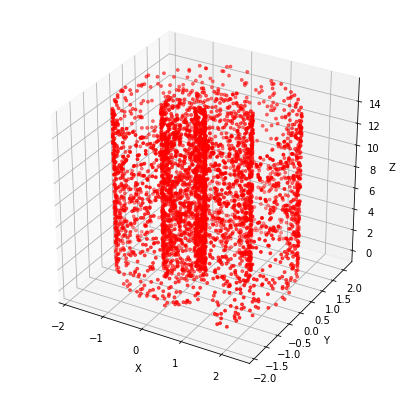

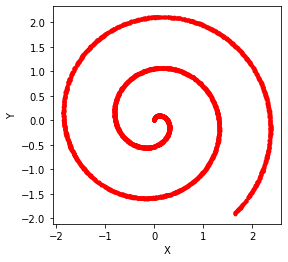

In [36]:
# set parameters
length_phi = 15   #length of swiss roll in angular direction
length_Z = 15     #length of swiss roll in z direction
sigma = 0.1       #noise strength
m = 4000         #number of samples

np.random.seed(1111)
# create dataset
phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
Z0 = length_Z*np.random.rand(m)
X0 = 1./6*(phi + sigma*xi)*np.sin(phi)
Y0 = 1./6*(phi + sigma*xi)*np.cos(phi)

swiss_roll = np.array([X0, Y0, Z0]).transpose()

fig = plt.figure(num=None, figsize=(7, 7))
ax = fig.gca(projection='3d')
ax.scatter(X0, Y0, Z0, c='r', cmap=plt.cm.Spectral, s=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

fig = plt.figure()
plt.axes().set_aspect('equal')
plt.scatter(X0, Y0, c='r', cmap=plt.cm.Spectral, s=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Instantiate the class `DiffusionMaps` using `alpha=0.5` for the Fokker-Plank diffusion operator; `n_evecs=3`, because the first eigenvector is non-informative; `sparse=True` with `k_neighbors=100`, for improved computational performance.

In [17]:
dfm = DiffusionMaps(alpha=0.5, n_evecs=3, sparse=True, k_neighbors=100, kernel_object=DiffusionMaps.gaussian_kernel)

Use the method `mapping` to compute the `n_evecs` diffusion coordinates.

In [22]:
diff_coords, evals, evecs = dfm.mapping(data=swiss_roll, epsilon=0.03)

Plot the second and third diffusion coordinates to reveal the embedded structure of the data.

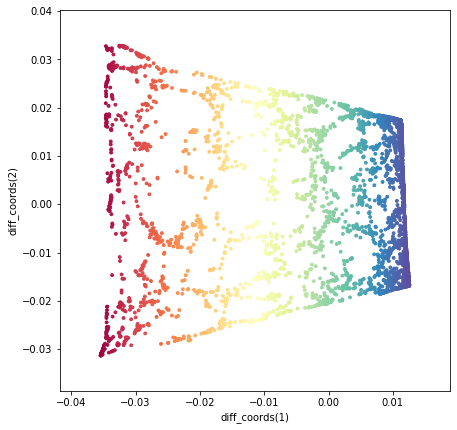

In [37]:
color = evecs[:,1]

fig = plt.figure(num=None, figsize=(7, 7))
plt.scatter(diff_coords[:,1], diff_coords[:,2], c=color, cmap=plt.cm.Spectral, s=8)
plt.xlabel('diff_coords(1)')
plt.ylabel('diff_coords(2)')
plt.show()

Use the colormap to observe how the embedded structure is distributed in the original set.

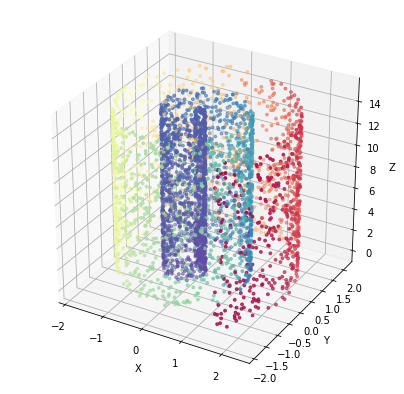

In [34]:
fig = plt.figure(num=None, figsize=(7, 7))
ax = fig.gca(projection='3d')
ax.scatter(X0, Y0, Z0, c=color, cmap=plt.cm.Spectral, s=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()